In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import json
import geopandas as gpd
from utils import getInputs, drawMap
import unidecode
import osmnx as ox
import os

plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
# enable completion
%config Completer.use_jedi = False

In [210]:
df = gpd.read_file('/home/thmegy/Téléchargements/Réseau_et_schéma_cyclable_métropolitain.geojson')

In [211]:
df.columns

Index(['amgt_exi', 'amgt_propo', 'commune', 'id', 'id_cycle', 'id_inddigo',
       'id_segment', 'longueur', 'niveau', 'nom_iti', 'programmation',
       'voie_empru', 'OBJECTID', 'SHAPE__Length', 'geometry'],
      dtype='object')

In [212]:
df['amgt_exi'].unique()

array(['Bande cyclable', None, 'Double sens cyclable',
       'Aménagement sur trottoir', 'Zone 30', 'Voie verte',
       'Aire piétonne', 'Bandes cyclables', 'Aménagement mixte',
       'Bande cyclable un côté', 'Partage de voirie',
       'Piste cyclable bidirectionnelle', 'Zone de rencontre', 'Autre',
       'Piste cyclable', 'Zone rencontre - Z30',
       'Piste cyclable monodirectionnelle', 'Inconnu', 'Passerelle',
       'Test', 'Zone 20', 'Franchissement', 'A definir'], dtype=object)

In [213]:
mask_amgt_propo = pd.notnull(df['amgt_propo'])
mask_amgt_exi = pd.notnull(df['amgt_exi'])

In [214]:
df_propo = df[mask_amgt_propo]
df_exi = df[mask_amgt_exi]

In [215]:
df_new['SHAPE__Length'].sum() / 1000

323.48885159587695

In [216]:
df_exi['SHAPE__Length'].sum() / 1000

400.38369423454975

In [217]:
piste = ['Piste cyclable bidirectionnelle', 'Piste cyclable bidirectionnelle ou voie verte',
        'Piste cyclable monodirectionnelle', 'Voie verte', 'Passerelle', 'Piste cyclable',
         'Aménagement sur trottoir']
partage = ['Zone 30 ou partage de voirie', 'Zone 30', 'Partage sans transit', 'Partage de voirie',
           'Zone rencontre - Z30']
bande = ['Bande cyclable', 'Bandes cyclables','Bande cyclable un côté', 'Voie centrale banalisée']
zone_rencontre = ['Zone de rencontre', 'Zone 20', 'Aire piétonne']
autre = ['Encorbellement', 'Aménagement mixte', 'Autre', 'Couloir bus/vélo',
        'Inconnu', 'A definir', 'Test', 'Franchissement']

In [218]:
df_propo['amgt_propo'] = df_propo['amgt_propo'].replace(piste, 'Piste séparée')
df_propo['amgt_propo'] = df_propo['amgt_propo'].replace(bande, 'Bande cyclable')
df_propo['amgt_propo'] = df_propo['amgt_propo'].replace(partage, 'Partage de voirie')
df_propo['amgt_propo'] = df_propo['amgt_propo'].replace(autre, 'Autres')
df_propo['amgt_propo'] = df_propo['amgt_propo'].replace(zone_rencontre, 'Zone de rencontre')

/home/thmegy/anaconda3/envs/geo-env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [219]:
df_exi['amgt_exi'] = df_exi['amgt_exi'].replace(piste, 'Piste séparée')
df_exi['amgt_exi'] = df_exi['amgt_exi'].replace(bande, 'Bande cyclable')
df_exi['amgt_exi'] = df_exi['amgt_exi'].replace(partage, 'Partage de voirie')
df_exi['amgt_exi'] = df_exi['amgt_exi'].replace(autre, 'Autres')
df_exi['amgt_exi'] = df_exi['amgt_exi'].replace(zone_rencontre, 'Zone de rencontre')

In [220]:
df_propo['amgt_propo'].unique()

array(['Piste séparée', 'Double sens cyclable', 'Étude annexe',
       'Partage de voirie', 'Bande cyclable', 'Autres',
       'Zone de rencontre'], dtype=object)

In [221]:
df_exi['amgt_exi'].unique()

array(['Bande cyclable', 'Double sens cyclable', 'Piste séparée',
       'Partage de voirie', 'Zone de rencontre', 'Autres'], dtype=object)

# Aménagements proposés

amgt_propo
Autres                    3.481095
Bande cyclable           22.199240
Double sens cyclable     53.966728
Partage de voirie        88.167729
Piste séparée           115.565968
Zone de rencontre         0.513035
Étude annexe             39.595057
Name: SHAPE__Length, dtype: float64


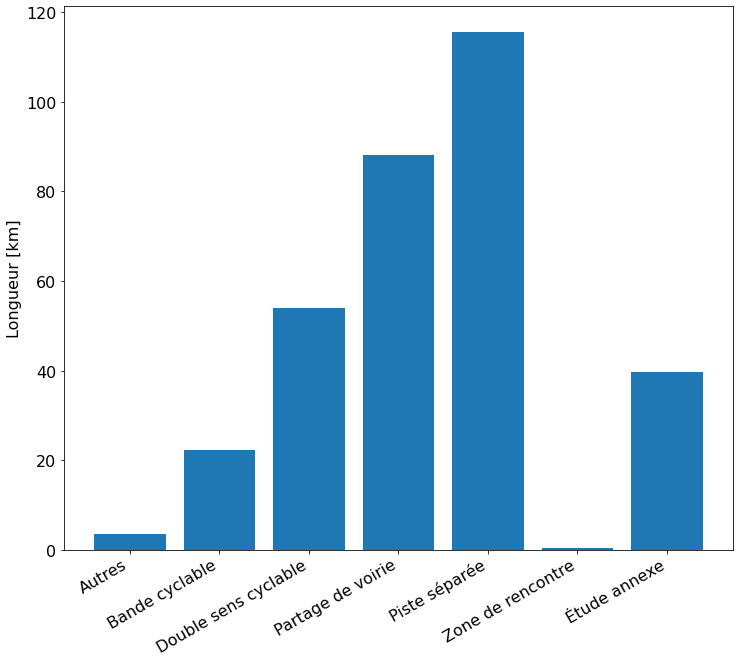

In [284]:
amgt_norm_propo = df_propo.groupby(['amgt_propo'])['SHAPE__Length'].sum() * 100 / df_propo['SHAPE__Length'].sum()
amgt_propo = df_propo.groupby(['amgt_propo'])['SHAPE__Length'].sum() / 1000
print(amgt_propo)

plt.figure(figsize=(12,10), facecolor='white')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Longueur [km]')
plt.bar(amgt_propo.index, amgt_propo)
plt.show()

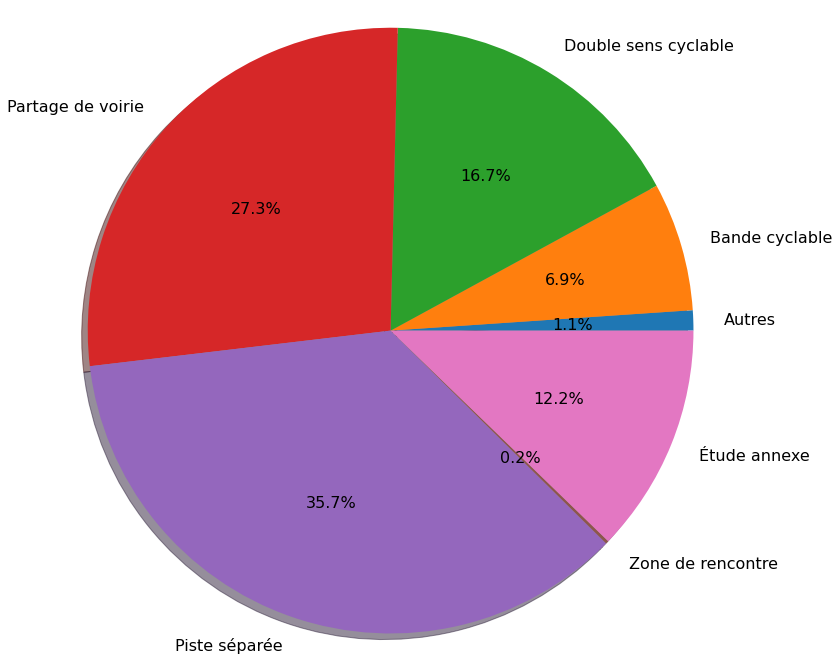

In [285]:
fig1, ax1 = plt.subplots(facecolor='white')
ax1.pie(amgt_norm_propo, labels=amgt_propo.index, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.show()

# Aménagements existants

amgt_exi
Autres                   12.201176
Bande cyclable           85.469320
Double sens cyclable     33.532694
Partage de voirie       146.251617
Piste séparée            95.573641
Zone de rencontre        27.355246
Name: SHAPE__Length, dtype: float64


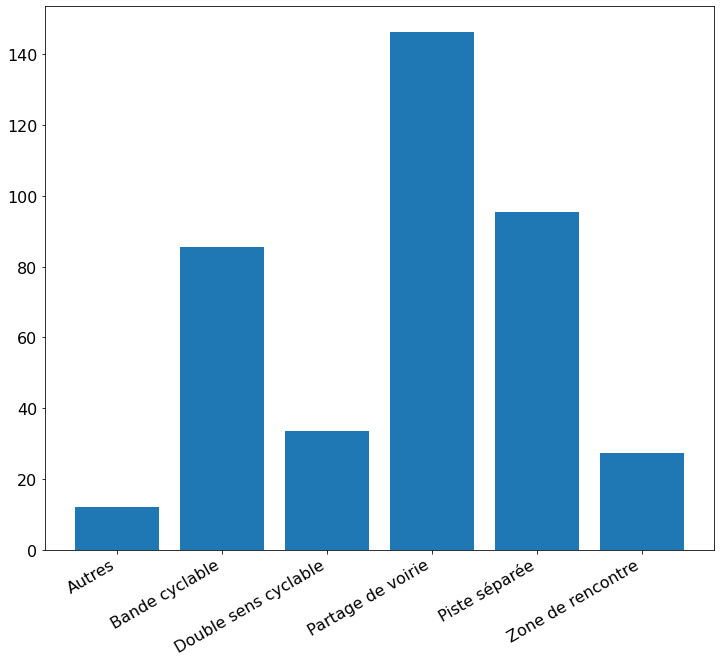

In [224]:
amgt_norm_exi = df_exi.groupby(['amgt_exi'])['SHAPE__Length'].sum() * 100 / df_exi['SHAPE__Length'].sum()
amgt_exi = df_exi.groupby(['amgt_exi'])['SHAPE__Length'].sum() / 1000
print(amgt_exi)

plt.figure(figsize=(12,10))
plt.xticks(rotation=30, ha='right')
plt.bar(amgt_exi.index, amgt_exi)
plt.show()

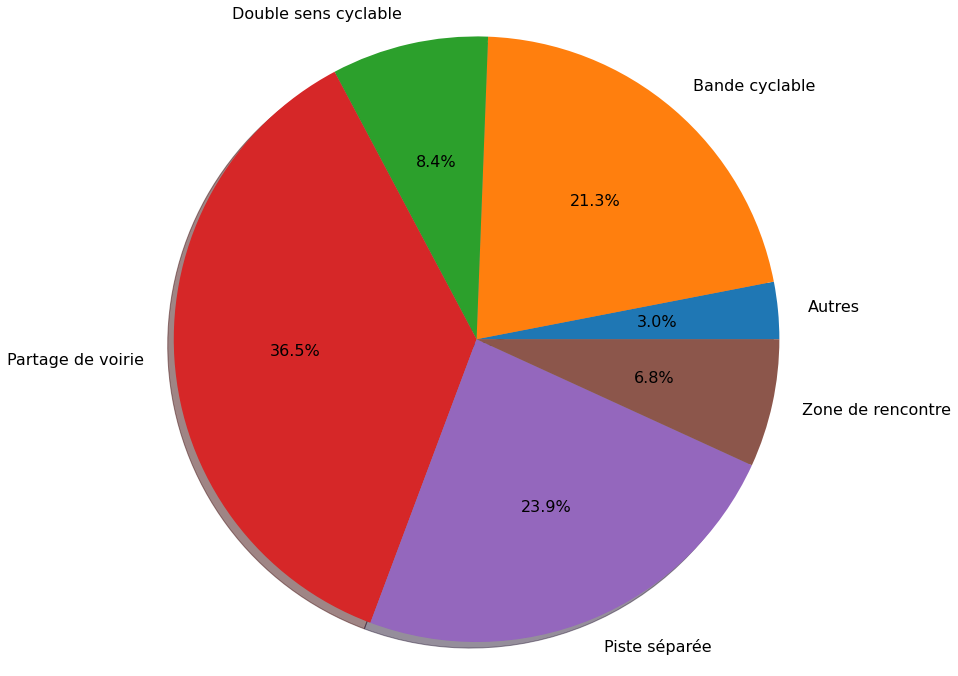

In [225]:
fig1, ax1 = plt.subplots()
ax1.pie(amgt_norm_exi, labels=amgt_exi.index, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')
plt.show()

# Cartes

In [290]:
communes = [
    'Clermont-Ferrand',
    'Aulnat',
    'Aubière',
    'Cébazat',
    'Chamalières',
    'Beaumont, Puy-de-dome',
    'Cournon d\'Auvergne',
    'Royat',
    'Le Cendre',
#    'Orcines',
    'Lempdes',
    'Pont-du-chateau',
    'Durtol',
    'Nohanent',
    'Blanzat',
    'Châteaugay',
    'Gerzat',
    'Romagnat',
    'Pérignat-lès-Sarliève',
#    'Saint-Gènes-Champanelle',
    'Ceyrat'
]

limites = ox.geocode_to_gdf(communes)

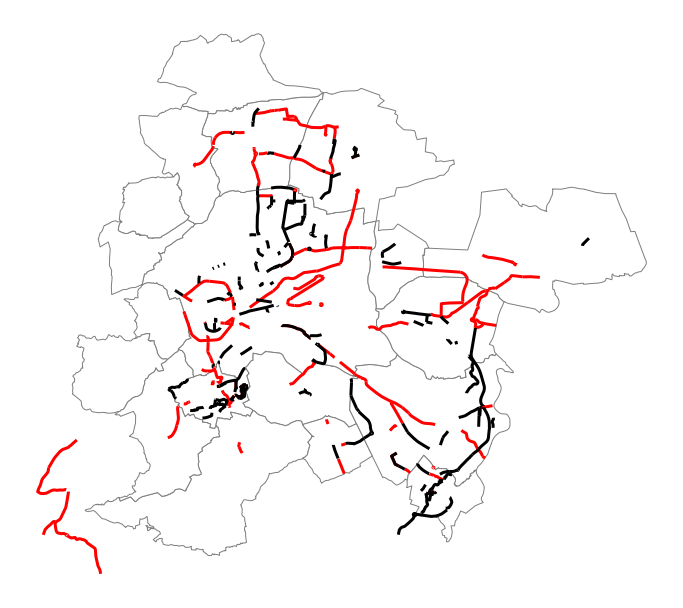

In [293]:
ax = limites.plot(color='white', edgecolor='gray', linewidth=1)

#mask = (df_propo['amgt_propo'] == 'Partage de voirie') | (df_propo['amgt_propo'] == 'Double sens cyclable')
mask = df_propo['amgt_propo'] == 'Piste séparée'
#mask = (df_propo['amgt_propo'] == 'Piste séparée') | (df_propo['amgt_propo'] == 'Bande cyclable')
gdf_propo = gpd.GeoDataFrame(df_propo[mask], geometry=df_propo[mask].geometry)
gdf_propo.plot(ax=ax, color='red', linewidth=3)

mask = df_exi['amgt_exi'] == 'Piste séparée'
#mask = (df_propo['amgt_propo'] == 'Piste séparée') | (df_propo['amgt_propo'] == 'Bande cyclable')
gdf_exi = gpd.GeoDataFrame(df_exi[mask], geometry=df_exi[mask].geometry)
gdf_exi.plot(ax=ax, color='black', linewidth=3)

plt.axis('off')
plt.show()

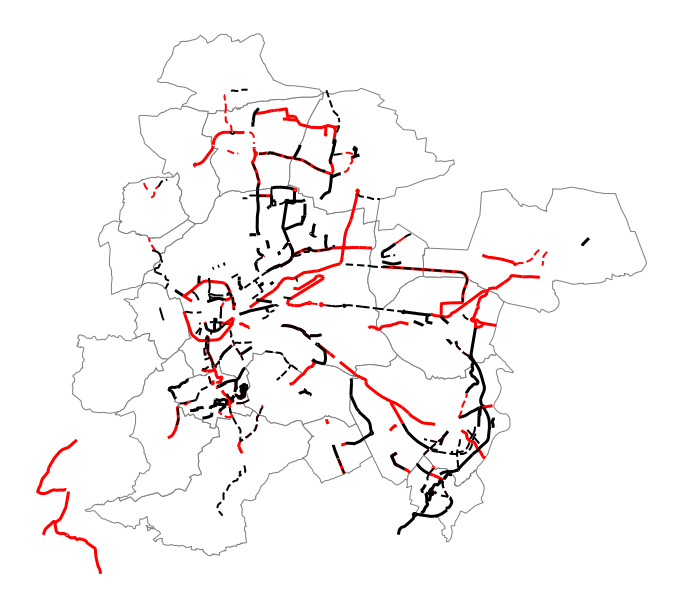

In [294]:
ax = limites.plot(color='white', edgecolor='gray', linewidth=1)

mask = df_propo['amgt_propo'] == 'Piste séparée'
gdf_propo = gpd.GeoDataFrame(df_propo[mask], geometry=df_propo[mask].geometry)
gdf_propo.plot(ax=ax, color='red', linewidth=3)

mask = df_exi['amgt_exi'] == 'Piste séparée'
gdf_exi = gpd.GeoDataFrame(df_exi[mask], geometry=df_exi[mask].geometry)
gdf_exi.plot(ax=ax, color='black', linewidth=3)

mask = df_propo['amgt_propo'] == 'Bande cyclable'
gdf_propo = gpd.GeoDataFrame(df_propo[mask], geometry=df_propo[mask].geometry)
ax = gdf_propo.plot(ax=ax, linestyle='dashed', color='red')

mask = df_exi['amgt_exi'] == 'Bande cyclable'
gdf_exi = gpd.GeoDataFrame(df_exi[mask], geometry=df_exi[mask].geometry)
gdf_exi.plot(ax=ax, linestyle='dashed', color='black')

plt.axis('off')
plt.show()